<a href="https://colab.research.google.com/github/ychencq/ECE-232E/blob/master/Project1/Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(igraph)
library(ggplot2)



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




# a)

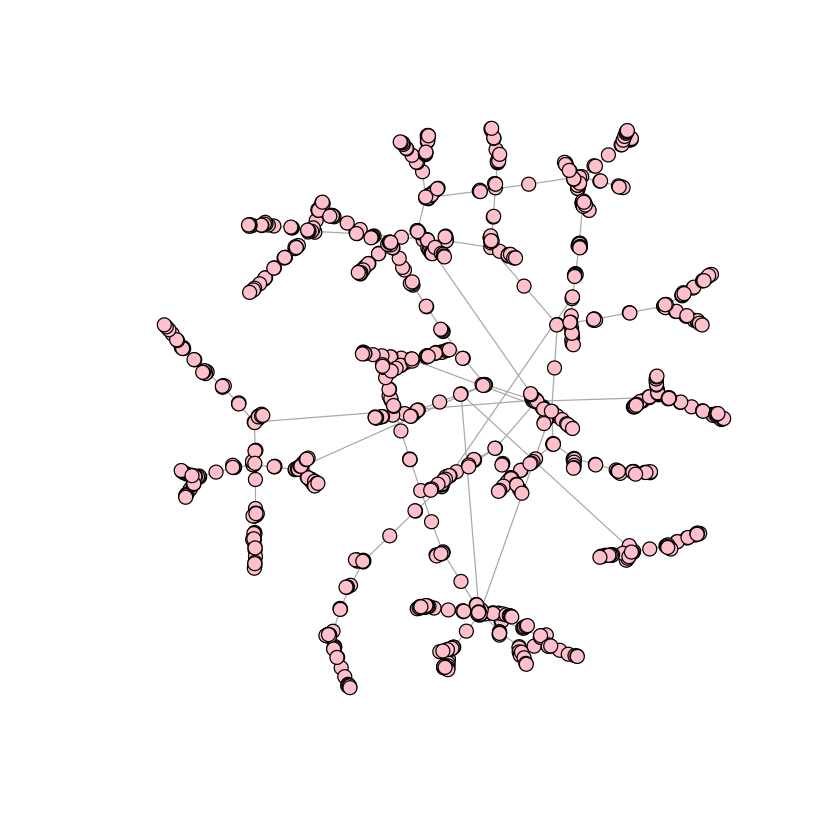

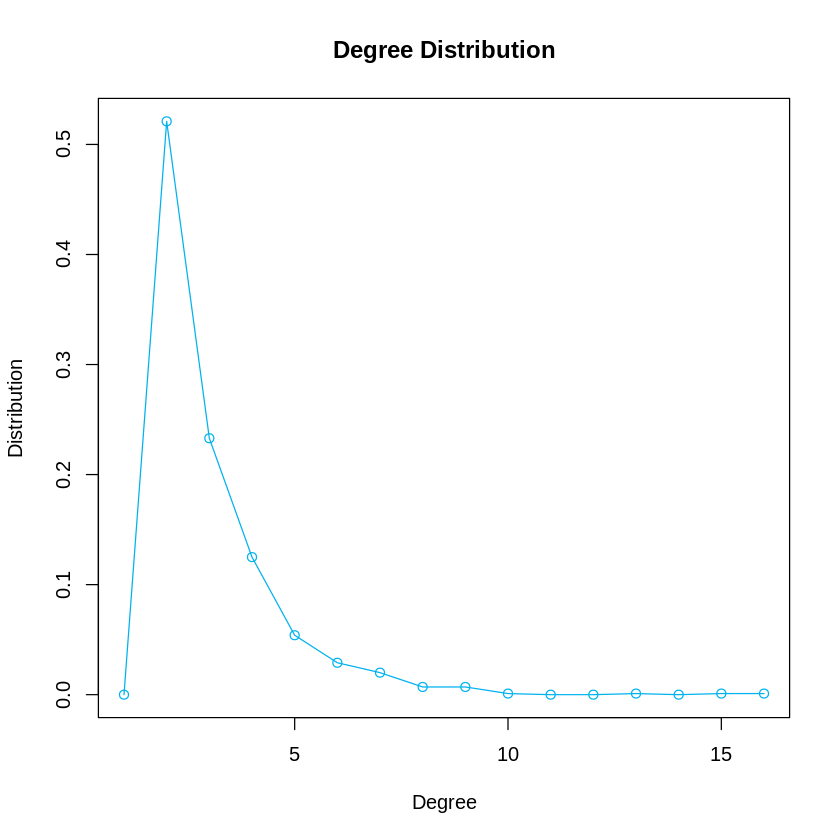

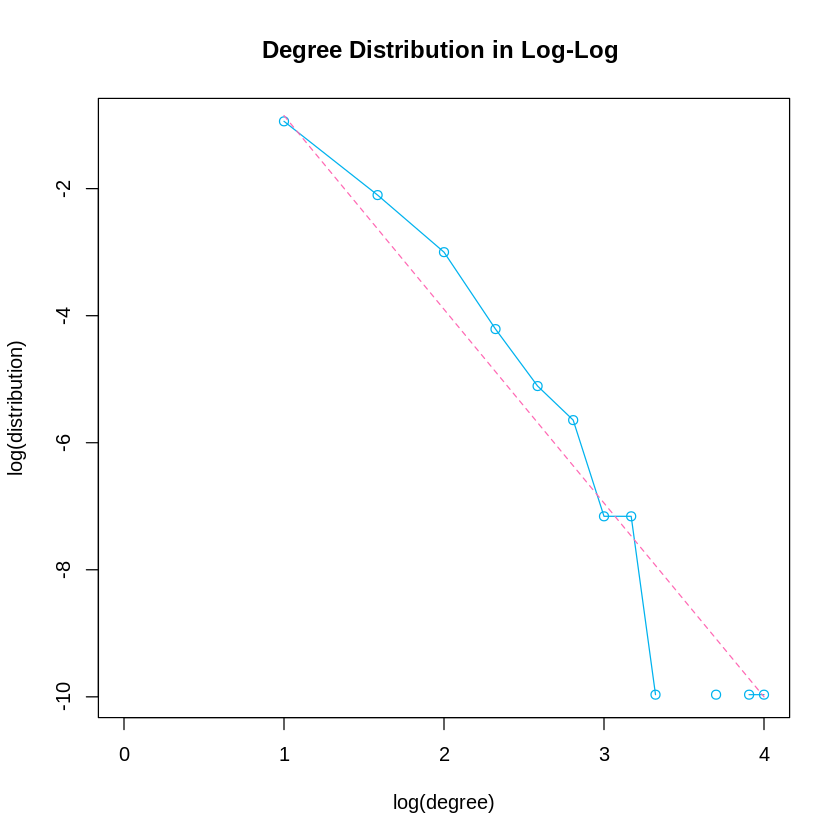

In [9]:
n = 1000
m = 1
alpha = 1
beta = -1
a = 1
b = 0
c = 1
d = 1
g = sample_pa_age(n=n, m=m, 1000, pa.exp=alpha, aging.exp= beta, directed = FALSE,
  zero.deg.appeal = a, zero.age.appeal = b, deg.coef = c, age.coef = d)
plot(g, edge.arrow.size=.5, vertex.color="pink", vertex.size=5, vertex.frame.color="black", vertex.label="") 

len = length(degree.distribution(g))
degrees = vector(mode = "numeric", length = len)
degrees[1:length(degree.distribution(g))]= degrees[1:length(degree.distribution(g))] + degree.distribution(g)
plot(seq(1:len),degrees,main="Degree Distribution",col = 'deepskyblue2',
     type = 'o',xlab="Degree",ylab="Distribution")


degrees_log = log2(c(1:length(degree.distribution(g))))
distribution_log = log2(degree.distribution(g))
# df <- data.frame(degrees, distribution_log)
# print(df)

plot(log2(seq(1:len)), distribution_log, type="o", col="deepskyblue2", main="Degree Distribution in Log-Log ",xlab="log(degree)",ylab="log(distribution)")
lines(seq(1,4,0.03), seq(-0.85,-10,-0.0915),col="hotpink",lty=2)


# b)

[1] "modularity:"


[1] 0.9350672

IGRAPH clustering fast greedy, groups: 31, mod: 0.94
+ groups:
  $`1`
   [1] 131 132 135 137 139 142 153 161 173 188 241 285 287 478 520 579 581 583
  [19] 591 614 621 624 693 695 727 733 734 739 740 744 746 751 756 764 768 778
  [37] 779 811 816 829 836 840 865 866 869 870 871 928 938
  
  $`2`
   [1]  10  11  19  21  22  25  26  35  36  38  41  42  46  53 100 120 122 123
  [19] 138 140 149 150 164 183 254 316 330 332 375 388 434 490 508 528 568 637
  [37] 721 856 863 878 880 881 882 883 884
  
  + ... omitted several groups/vertices


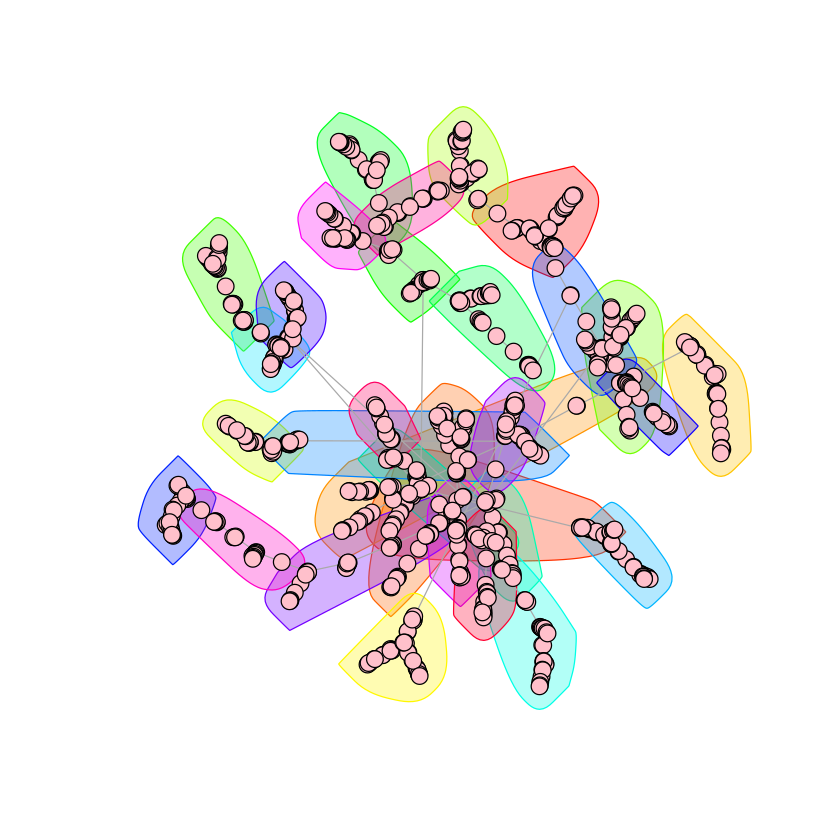

In [10]:
communities = cluster_fast_greedy(g)
print("modularity:")
modularity(communities)
print(communities)
plot(g, mark.groups=groups(communities), edge.arrow.size=.5, 
     vertex.color="pink", vertex.size=6, vertex.frame.color="black", vertex.label="")

index <- c(1:length(communities))
size <- as.vector(sizes(communities))
comm_df <- data.frame(index, size)